In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 14

# Reading Old Dataset

In [2]:
dataOld = pd.read_csv('Processed_Data_part.csv')

In [3]:
print len(dataOld)
dataOld.head()

10003


mineid contract                                            subunit  \
0  100003      NaN  Surface:  Strip or open pit mines including as...   
1  100003      NaN  Surface:  Strip or open pit mines including as...   
2  100003      NaN  Surface:  Strip or open pit mines including as...   
3  100003  LK7      Surface:  Strip or open pit mines including as...   
4  100003      NaN  Surface:  Strip or open pit mines including as...   

      month  day    time         inspoff    state  county  \
0   January   19  1000.0  Birmingham, AL  Alabama     117   
1  February    4  1345.0  Birmingham, AL  Alabama     117   
2      July   18  1000.0  Birmingham, AL  Alabama     117   
3    August    8   645.0  Birmingham, AL  Alabama     117   
4    August   28   900.0  Birmingham, AL  Alabama     117   

                              sic  ...   expjob  year  \
0  Limestone (crushed and broken)  ...      2.0  1983   
1  Limestone (crushed and broken)  ...     28.0  1983   
2  Limestone (crushed and broken)  ...      3.0  1983   
3  Limestone (crushed and broken)  ...     30.0  1983   
4  Limestone (crushed and broken)  ...      2.0  1983   

                      injtype daystotl  \
0          NDL (No days lost)      0.0   
1  NFDL (Nonfatal, days lost)      5.0   
2                         NaN      0.0   
3  NFDL (Nonfatal, days lost)    235.0   
4  NFDL (Nonfatal, days lost)      1.0   

                                   jobtitl2                  coalmetl  \
0                   Bulldozer/tractor oper.  Metal/Nonmetal/Stone/S&G   
1                 Mechanic/repairman/helper  Metal/Nonmetal/Stone/S&G   
2  Sizing/washing/cleaning plant opr/worker  Metal/Nonmetal/Stone/S&G   
3                              Truck driver  Metal/Nonmetal/Stone/S&G   
4                 Mechanic/repairman/helper  Metal/Nonmetal/Stone/S&G   

     opercont      district              commod  occup  
0    Operator  Southeastern      Stone operator    NaN  
1    Operator  Southeastern      Stone operator    NaN  
2    Operator  Southeastern      Stone operator    NaN  
3  Contractor  Southeastern  Noncoal contractor    NaN  
4    Operator  Southeastern      Stone operator    NaN  

[5 rows x 61 columns]

# Reading Modified Dataset

In [4]:
data = pd.read_csv('mine_accidents.csv')
print len(data)
data.head()

10003


mine_id contractor                                            subunit  \
0   100003        NaN  Surface:  Strip or open pit mines including as...   
1   100003        NaN  Surface:  Strip or open pit mines including as...   
2   100003        NaN  Surface:  Strip or open pit mines including as...   
3   100003    LK7      Surface:  Strip or open pit mines including as...   
4   100003        NaN  Surface:  Strip or open pit mines including as...   

  month_accident  day_accident  time_accident inspection_office    state  \
0        January            19         1000.0    Birmingham, AL  Alabama   
1       February             4         1345.0    Birmingham, AL  Alabama   
2           July            18         1000.0    Birmingham, AL  Alabama   
3         August             8          645.0    Birmingham, AL  Alabama   
4         August            28          900.0    Birmingham, AL  Alabama   

   county        standard_industrial_code  ...   expjob  year  \
0     117  Limestone (crushed and broken)  ...      2.0  1983   
1     117  Limestone (crushed and broken)  ...     28.0  1983   
2     117  Limestone (crushed and broken)  ...      3.0  1983   
3     117  Limestone (crushed and broken)  ...     30.0  1983   
4     117  Limestone (crushed and broken)  ...      2.0  1983   

                      injtype daystotl  \
0          NDL (No days lost)      0.0   
1  NFDL (Nonfatal, days lost)      5.0   
2                         NaN      0.0   
3  NFDL (Nonfatal, days lost)    235.0   
4  NFDL (Nonfatal, days lost)      1.0   

                                   jobtitl2                  coalmetl  \
0                   Bulldozer/tractor oper.  Metal/Nonmetal/Stone/S&G   
1                 Mechanic/repairman/helper  Metal/Nonmetal/Stone/S&G   
2  Sizing/washing/cleaning plant opr/worker  Metal/Nonmetal/Stone/S&G   
3                              Truck driver  Metal/Nonmetal/Stone/S&G   
4                 Mechanic/repairman/helper  Metal/Nonmetal/Stone/S&G   

     opercont      district              commod  occup  
0    Operator  Southeastern      Stone operator    NaN  
1    Operator  Southeastern      Stone operator    NaN  
2    Operator  Southeastern      Stone operator    NaN  
3  Contractor  Southeastern  Noncoal contractor    NaN  
4    Operator  Southeastern      Stone operator    NaN  

[5 rows x 61 columns]

## Se elimina la columna <i>'occup'</i> porque no tiene valores

In [5]:
data.drop(['occup'], axis=1, inplace=True)
data.head()

mine_id contractor                                            subunit  \
0   100003        NaN  Surface:  Strip or open pit mines including as...   
1   100003        NaN  Surface:  Strip or open pit mines including as...   
2   100003        NaN  Surface:  Strip or open pit mines including as...   
3   100003    LK7      Surface:  Strip or open pit mines including as...   
4   100003        NaN  Surface:  Strip or open pit mines including as...   

  month_accident  day_accident  time_accident inspection_office    state  \
0        January            19         1000.0    Birmingham, AL  Alabama   
1       February             4         1345.0    Birmingham, AL  Alabama   
2           July            18         1000.0    Birmingham, AL  Alabama   
3         August             8          645.0    Birmingham, AL  Alabama   
4         August            28          900.0    Birmingham, AL  Alabama   

   county        standard_industrial_code         ...          expmine expjob  \
0     117  Limestone (crushed and broken)         ...          4.00000    2.0   
1     117  Limestone (crushed and broken)         ...          9.00000   28.0   
2     117  Limestone (crushed and broken)         ...          3.00000    3.0   
3     117  Limestone (crushed and broken)         ...          0.07666   30.0   
4     117  Limestone (crushed and broken)         ...          4.00000    2.0   

   year                     injtype daystotl  \
0  1983          NDL (No days lost)      0.0   
1  1983  NFDL (Nonfatal, days lost)      5.0   
2  1983                         NaN      0.0   
3  1983  NFDL (Nonfatal, days lost)    235.0   
4  1983  NFDL (Nonfatal, days lost)      1.0   

                                   jobtitl2                  coalmetl  \
0                   Bulldozer/tractor oper.  Metal/Nonmetal/Stone/S&G   
1                 Mechanic/repairman/helper  Metal/Nonmetal/Stone/S&G   
2  Sizing/washing/cleaning plant opr/worker  Metal/Nonmetal/Stone/S&G   
3                              Truck driver  Metal/Nonmetal/Stone/S&G   
4                 Mechanic/repairman/helper  Metal/Nonmetal/Stone/S&G   

     opercont      district              commod  
0    Operator  Southeastern      Stone operator  
1    Operator  Southeastern      Stone operator  
2    Operator  Southeastern      Stone operator  
3  Contractor  Southeastern  Noncoal contractor  
4    Operator  Southeastern      Stone operator  

[5 rows x 60 columns]

## Se elimina la columna <i>'narrtxt1'</i> y <i>'narrtxt1'</i>, estas se encargan de explicar en mas detalle el accidente, pero ya la variable <i>'accident_type'</i> lo resume.

In [6]:
data.drop(['narrtxt1', 'narrtxt2'], axis=1, inplace=True)
data.head()

mine_id contractor                                            subunit  \
0   100003        NaN  Surface:  Strip or open pit mines including as...   
1   100003        NaN  Surface:  Strip or open pit mines including as...   
2   100003        NaN  Surface:  Strip or open pit mines including as...   
3   100003    LK7      Surface:  Strip or open pit mines including as...   
4   100003        NaN  Surface:  Strip or open pit mines including as...   

  month_accident  day_accident  time_accident inspection_office    state  \
0        January            19         1000.0    Birmingham, AL  Alabama   
1       February             4         1345.0    Birmingham, AL  Alabama   
2           July            18         1000.0    Birmingham, AL  Alabama   
3         August             8          645.0    Birmingham, AL  Alabama   
4         August            28          900.0    Birmingham, AL  Alabama   

   county        standard_industrial_code         ...          expmine expjob  \
0     117  Limestone (crushed and broken)         ...          4.00000    2.0   
1     117  Limestone (crushed and broken)         ...          9.00000   28.0   
2     117  Limestone (crushed and broken)         ...          3.00000    3.0   
3     117  Limestone (crushed and broken)         ...          0.07666   30.0   
4     117  Limestone (crushed and broken)         ...          4.00000    2.0   

   year                     injtype daystotl  \
0  1983          NDL (No days lost)      0.0   
1  1983  NFDL (Nonfatal, days lost)      5.0   
2  1983                         NaN      0.0   
3  1983  NFDL (Nonfatal, days lost)    235.0   
4  1983  NFDL (Nonfatal, days lost)      1.0   

                                   jobtitl2                  coalmetl  \
0                   Bulldozer/tractor oper.  Metal/Nonmetal/Stone/S&G   
1                 Mechanic/repairman/helper  Metal/Nonmetal/Stone/S&G   
2  Sizing/washing/cleaning plant opr/worker  Metal/Nonmetal/Stone/S&G   
3                              Truck driver  Metal/Nonmetal/Stone/S&G   
4                 Mechanic/repairman/helper  Metal/Nonmetal/Stone/S&G   

     opercont      district              commod  
0    Operator  Southeastern      Stone operator  
1    Operator  Southeastern      Stone operator  
2    Operator  Southeastern      Stone operator  
3  Contractor  Southeastern  Noncoal contractor  
4    Operator  Southeastern      Stone operator  

[5 rows x 58 columns]

## Una posible variable a predecir : <i>accident_type</i>. Lo cual indica el tipo de accidente que ha sufrido la persona en la mina. Existen 42 tipos de accidentes, es decir, 42 posibles clases a predecir.

In [7]:
y = data['accident_type'].unique()
print len(y)
y

42


array(['Struck against moving object',
       'Contact with hot objects or substances',
       'Over-exertion in lifting objects', 'Caught in-under-between NEC',
       'Absorption of various noxious substances', 'Struck by NEC',
       'Fall down stairs', 'Struck by flying object',
       'Caught in-under-between a moving and stationary object',
       'Struck against stationary object',
       'Fall from headframe,derrick, or tower',
       'Fall onto or against objects',
       'Fall from machine,vehicle, or equipment',
       'Struck by falling object', 'Over-exertion NEC',
       'Fall from ladders',
       'Caught in-under-between collapsing material or buildings',
       'Flash burns (electric)',
       'Over-exertion in pulling or pushing objects',
       'Accident type without injuries',
       'Fall to the walkway or working surface',
       'Struck by powered moving object', 'Bodily reaction NEC',
       'Not elsewhere classified', 'Struck by rolling object (sliding)',
     

## La variable <i>'accident_type'</i> no esta balanceada, es decir, la cantidad de accidentes de una misma clase varian mucho, esto provoca que el modelo este a favor solo por la clase de mayor cantidad. Para evitar esto se puede considerar una particion stratificada de datos y no un simple split. Se puede considerar tambien unir las clases de menor frecuencia en una sola.

In [8]:
data["accident_type"].value_counts()

Struck by falling object                                      1243
Struck by NEC                                                 1136
Accident type without injuries                                 881
Over-exertion in lifting objects                               811
Over-exertion NEC                                              762
Struck against stationary object                               722
Caught in-under-between a moving and stationary object         660
Fall from machine,vehicle, or equipment                        502
Caught in-under-between NEC                                    484
Struck by flying object                                        410
Fall to the walkway or working surface                         353
Struck against moving object                                   352
Fall onto or against objects                                   302
Over-exertion in pulling or pushing objects                    228
Contact with hot objects or substances                        

# Fill NaN/Na values

## La columna <i>'contractor'</i> indica si la empresa minera contrató una contratista para realizar el trabajo, o si la misma minera lo realizó. Se observa que solo se contrató 318 veces de las 10003 veces, es decir, solo 3%. La mayoria de los trabajos lo realizo la empresa, esta columna se podria eliminar pero se vera luego si afecta en la variabilidad y solapamiento de los datos.

In [9]:
from __future__ import division

print 'Size without nan: ', len(data.contractor.dropna())
print 'Size Total: ', len(data.contractor)
print 'Percentage: ', (len(data.contractor.dropna())/len(data.contractor))*100

Size without nan:  318
Size Total:  10003
Percentage:  3.17904628611


In [10]:
data.contractor.fillna('same_mine', inplace=True)
data.head()

mine_id contractor                                            subunit  \
0   100003  same_mine  Surface:  Strip or open pit mines including as...   
1   100003  same_mine  Surface:  Strip or open pit mines including as...   
2   100003  same_mine  Surface:  Strip or open pit mines including as...   
3   100003    LK7      Surface:  Strip or open pit mines including as...   
4   100003  same_mine  Surface:  Strip or open pit mines including as...   

  month_accident  day_accident  time_accident inspection_office    state  \
0        January            19         1000.0    Birmingham, AL  Alabama   
1       February             4         1345.0    Birmingham, AL  Alabama   
2           July            18         1000.0    Birmingham, AL  Alabama   
3         August             8          645.0    Birmingham, AL  Alabama   
4         August            28          900.0    Birmingham, AL  Alabama   

   county        standard_industrial_code         ...          expmine expjob  \
0     117  Limestone (crushed and broken)         ...          4.00000    2.0   
1     117  Limestone (crushed and broken)         ...          9.00000   28.0   
2     117  Limestone (crushed and broken)         ...          3.00000    3.0   
3     117  Limestone (crushed and broken)         ...          0.07666   30.0   
4     117  Limestone (crushed and broken)         ...          4.00000    2.0   

   year                     injtype daystotl  \
0  1983          NDL (No days lost)      0.0   
1  1983  NFDL (Nonfatal, days lost)      5.0   
2  1983                         NaN      0.0   
3  1983  NFDL (Nonfatal, days lost)    235.0   
4  1983  NFDL (Nonfatal, days lost)      1.0   

                                   jobtitl2                  coalmetl  \
0                   Bulldozer/tractor oper.  Metal/Nonmetal/Stone/S&G   
1                 Mechanic/repairman/helper  Metal/Nonmetal/Stone/S&G   
2  Sizing/washing/cleaning plant opr/worker  Metal/Nonmetal/Stone/S&G   
3                              Truck driver  Metal/Nonmetal/Stone/S&G   
4                 Mechanic/repairman/helper  Metal/Nonmetal/Stone/S&G   

     opercont      district              commod  
0    Operator  Southeastern      Stone operator  
1    Operator  Southeastern      Stone operator  
2    Operator  Southeastern      Stone operator  
3  Contractor  Southeastern  Noncoal contractor  
4    Operator  Southeastern      Stone operator  

[5 rows x 58 columns]

## La columna <i>'underground_method'</i> indica el metodo que la empresa minera usa para la extraccion de la materia prima. El metodo mas usado es <i>Continuous</i>, debido a que son muchos valores (30%) como para eliminar la columna, se llenara los nan con la moda.

In [11]:
print 'Size without nan: ', len(data.underground_method.dropna())
print 'Size Total: ', len(data.underground_method)
print 'Percentage: ', (len(data.underground_method.dropna())/len(data.underground_method))*100

Size without nan:  3157
Size Total:  10003
Percentage:  31.5605318404


In [12]:
data.underground_method.value_counts()

Continuous      1955
Conventional     781
Longwall         162
Caving           143
Other            108
Hand               6
Shortwall          2
Name: underground_method, dtype: int64

In [13]:
data.underground_method.fillna('Continuous', inplace=True)

In [14]:
data.underground_method.head()

0    Continuous
1    Continuous
2    Continuous
3    Continuous
4    Continuous
Name: underground_method, dtype: object

## La columna <i>'equipment_model'</i> indica el modelo de la maquina, es solo un id, y la frecuencia de aparicion es poca, por lo tanto se elimina la columna.

In [15]:
data.equipment_model.head()

0               
1               
2               
3    340D       
4               
Name: equipment_model, dtype: object

In [16]:
print 'Size without nan: ', len(data.equipment_model.dropna())
print 'Size Total: ', len(data.equipment_model)
print 'Percentage: ', (len(data.equipment_model.dropna())/len(data.equipment_model))*100

Size without nan:  10003
Size Total:  10003
Percentage:  100.0


In [17]:
data.equipment_model.value_counts().head()

               8354
300              31
D-9              23
83               22
10SC             21
Name: equipment_model, dtype: int64

In [18]:
data.drop(['equipment_model'], axis=1, inplace=True)

In [19]:
data.head(5)

mine_id contractor                                            subunit  \
0   100003  same_mine  Surface:  Strip or open pit mines including as...   
1   100003  same_mine  Surface:  Strip or open pit mines including as...   
2   100003  same_mine  Surface:  Strip or open pit mines including as...   
3   100003    LK7      Surface:  Strip or open pit mines including as...   
4   100003  same_mine  Surface:  Strip or open pit mines including as...   

  month_accident  day_accident  time_accident inspection_office    state  \
0        January            19         1000.0    Birmingham, AL  Alabama   
1       February             4         1345.0    Birmingham, AL  Alabama   
2           July            18         1000.0    Birmingham, AL  Alabama   
3         August             8          645.0    Birmingham, AL  Alabama   
4         August            28          900.0    Birmingham, AL  Alabama   

   county        standard_industrial_code         ...          expmine expjob  \
0     117  Limestone (crushed and broken)         ...          4.00000    2.0   
1     117  Limestone (crushed and broken)         ...          9.00000   28.0   
2     117  Limestone (crushed and broken)         ...          3.00000    3.0   
3     117  Limestone (crushed and broken)         ...          0.07666   30.0   
4     117  Limestone (crushed and broken)         ...          4.00000    2.0   

   year                     injtype daystotl  \
0  1983          NDL (No days lost)      0.0   
1  1983  NFDL (Nonfatal, days lost)      5.0   
2  1983                         NaN      0.0   
3  1983  NFDL (Nonfatal, days lost)    235.0   
4  1983  NFDL (Nonfatal, days lost)      1.0   

                                   jobtitl2                  coalmetl  \
0                   Bulldozer/tractor oper.  Metal/Nonmetal/Stone/S&G   
1                 Mechanic/repairman/helper  Metal/Nonmetal/Stone/S&G   
2  Sizing/washing/cleaning plant opr/worker  Metal/Nonmetal/Stone/S&G   
3                              Truck driver  Metal/Nonmetal/Stone/S&G   
4                 Mechanic/repairman/helper  Metal/Nonmetal/Stone/S&G   

     opercont      district              commod  
0    Operator  Southeastern      Stone operator  
1    Operator  Southeastern      Stone operator  
2    Operator  Southeastern      Stone operator  
3  Contractor  Southeastern  Noncoal contractor  
4    Operator  Southeastern      Stone operator  

[5 rows x 57 columns]

# Dropeamos los valores nan si existe en una fila, nos quedamos con 2082, casi un 2o% de la data, se podria trabajar con esto. En una analisis mas exhaustivo se tendria que eliminar la menor cantidad de filas.

In [20]:
data.dropna(inplace=True)

In [21]:
print len(data)
data.head()

2082


mine_id contractor                                            subunit  \
3    100003    LK7      Surface:  Strip or open pit mines including as...   
13   100008  same_mine  Mill or preparation plant:Mill prep plant or b...   
20   100009  same_mine  Mill or preparation plant:Mill prep plant or b...   
21   100011  same_mine  Mill or preparation plant:Mill prep plant or b...   
33   100028  same_mine  Mill or preparation plant:Mill prep plant or b...   

   month_accident  day_accident  time_accident inspection_office    state  \
3          August             8          645.0    Birmingham, AL  Alabama   
13          March            29          730.0    Birmingham, AL  Alabama   
20       November             4         1145.0    Birmingham, AL  Alabama   
21         August            13          200.0    Birmingham, AL  Alabama   
33       February            24         1700.0      Franklin, TN  Alabama   

    county        standard_industrial_code         ...           expmine  \
3      117  Limestone (crushed and broken)         ...          0.076660   
13     117                            Lime         ...          5.000000   
20      73  Limestone (crushed and broken)         ...          7.459959   
21     121       Marble (crushed & broken)         ...          5.229979   
33      49  Limestone (crushed and broken)         ...          0.977413   

       expjob  year                     injtype daystotl  \
3   30.000000  1983  NFDL (Nonfatal, days lost)    235.0   
13   5.000000  1983  NFDL (Nonfatal, days lost)    700.0   
20   0.344969  1983  NFDL (Nonfatal, days lost)     44.0   
21   5.229979  1983  NFDL (Nonfatal, days lost)     72.0   
33   0.977413  1983  NFDL (Nonfatal, days lost)     23.0   

                                    jobtitl2                  coalmetl  \
3                               Truck driver  Metal/Nonmetal/Stone/S&G   
13             Laborer/utility man/bull gang  Metal/Nonmetal/Stone/S&G   
20             Laborer/utility man/bull gang  Metal/Nonmetal/Stone/S&G   
21  Sizing/washing/cleaning plant opr/worker  Metal/Nonmetal/Stone/S&G   
33                 Mechanic/repairman/helper  Metal/Nonmetal/Stone/S&G   

      opercont      district              commod  
3   Contractor  Southeastern  Noncoal contractor  
13    Operator  Southeastern      Stone operator  
20    Operator  Southeastern      Stone operator  
21    Operator  Southeastern      Stone operator  
33    Operator  Southeastern      Stone operator  

[5 rows x 57 columns]

# Mapeamos variables categoricas a numericas

In [22]:
from collections import defaultdict
encodersDict = defaultdict(LabelEncoder)

def categoricalColumns(df):
    df = df.copy()
    cols = df.columns
    cols_numeric = df._get_numeric_data().columns
    return list(set(cols) - set(cols_numeric))

def categoricalToNumeric(df):
    df = df.copy()
    cat_columns = categoricalColumns(df)
    print('Categorical columns: ', cat_columns)
    print('Size columns: ', len(cat_columns))
    if cat_columns:
        for category in cat_columns:
#             encoder = LabelEncoder()
#             df.loc[:, category] = encoder.fit_transform(df[category])
            x = df[category]
            df.loc[:, category] = encodersDict[x.name].fit_transform(x)

    return df

Todas los objetos LabelEncoder se encuentra en el dictionary d, para su posterior uso.

In [23]:
dataNew = categoricalToNumeric(data)

('Categorical columns: ', ['permanently_transf_termi', 'underground_method', 'standard_industrial_code', 'accident_code', 'inspection_office', 'part_body', 'coalmetl', 'nature_injury', 'mine_worker_activity', 'district', 'degree_injury', 'accident_injury_illness', 'source_injury', 'contractor', 'state', 'mining_machine', 'subunit', 'job_title', 'sex_person', 'injtype', 'completion_code', 'accident_type', 'opercont', 'metal_nometal_coal', 'canvass_class', 'month_accident', 'trade_name_equipment', 'underground_location', 'jobtitl2', 'commod'])
('Size columns: ', 30)


In [24]:
dataNew.head()

mine_id  contractor  subunit  month_accident  day_accident  time_accident  \
3    100003          14        7               1             8          645.0   
13   100008          31        4               7            29          730.0   
20   100009          31        4               9             4         1145.0   
21   100011          31        4               1            13          200.0   
33   100028          31        4               3            24         1700.0   

    inspection_office  state  county  standard_industrial_code   ...    \
3                   6      0     117                        17   ...     
13                  6      0     117                        16   ...     
20                  6      0      73                        17   ...     
21                  6      0     121                        20   ...     
33                 17      0      49                        17   ...     

     expmine     expjob  year  injtype  daystotl  jobtitl2  coalmetl  \
3   0.076660  30.000000  1983        1     235.0        67         1   
13  5.000000   5.000000  1983        1     700.0        33         1   
20  7.459959   0.344969  1983        1      44.0        33         1   
21  5.229979   5.229979  1983        1      72.0        58         1   
33  0.977413   0.977413  1983        1      23.0        39         1   

    opercont  district  commod  
3          0        10       3  
13         1        10       6  
20         1        10       6  
21         1        10       6  
33         1        10       6  

[5 rows x 57 columns]

# Feature Importance for each variable

In [25]:

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['accident_type'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
#     if performCV:
#         cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
#     #Print model report:
#     print "\nModel Report"
#     print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
#     print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
    
#     if performCV:
#         print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances', figsize=(14.,7.))
        plt.ylabel('Feature Importance Score')
        plt.show()
        plt.close()
    
    return feat_imp


## First estimator ExtraTreesClassifier

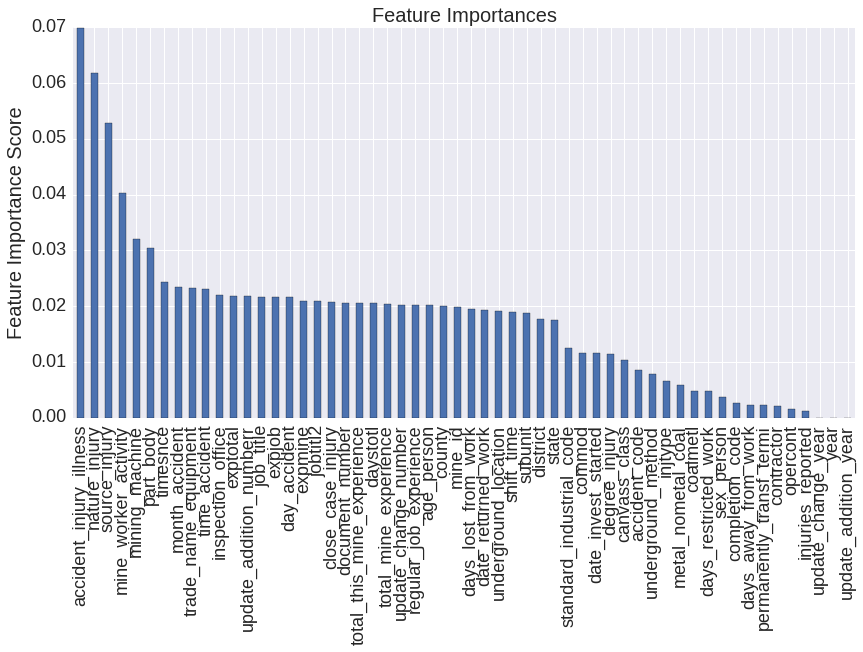

accident_injury_illness    0.069795
nature_injury              0.061754
source_injury              0.052895
mine_worker_activity       0.040344
mining_machine             0.032072
part_body                  0.030382
dtype: float64
CPU times: user 1.4 s, sys: 360 ms, total: 1.76 s
Wall time: 1.24 s


In [26]:
%%time
target = 'accident_type'
#IDcol = 'mineid'

predictors = [x for x in dataNew if x not in [target]]
model = ExtraTreesClassifier(random_state=10)
fi = modelfit(model, dataNew, predictors)
print fi.head(6)


## Second estimator GradientBoostingClassifier

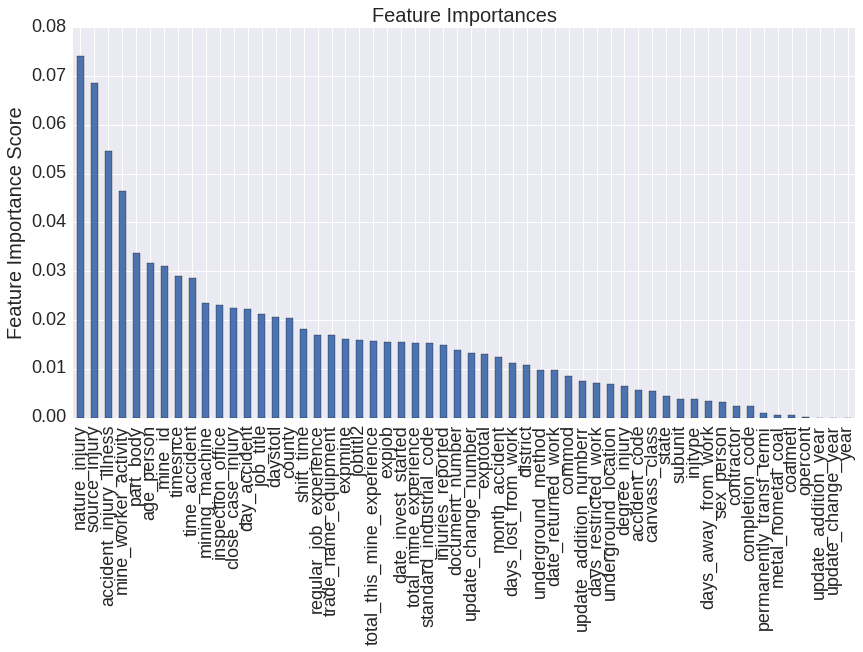

nature_injury              0.074154
source_injury              0.068615
accident_injury_illness    0.054613
mine_worker_activity       0.046429
part_body                  0.033698
age_person                 0.031606
dtype: float64
CPU times: user 32.1 s, sys: 430 ms, total: 32.5 s
Wall time: 32.2 s


In [27]:
%%time
target = 'accident_type'
#IDcol = 'mineid'

predictors = [x for x in dataNew if x not in [target]]
model = GradientBoostingClassifier(random_state=10)
fi = modelfit(model, dataNew, predictors)
print fi.head(6)



Se observa que las variables <i>accident_injury_illness</i>, <i>nature_injury</i>, <i>source_injury</i> son las que mayor score obtienen, esto significa que estas variables tienen una mayor relevancia para la variable de respuesta <i>accident_type</i>, y por ello, aportarán en gran medida al perfomance del modelo. 

<i><b>accident_injury_illness</b></i>: Powered haulage, Slip or fall of person (from an elevation or on the same level), Handling material, etc.
<br>
<i><b>nature_injury</b></i> : Sprain, strains; Burn or scald (heat), etc.
<br>
<i><b>source_injury</b></i> : Explosives, Flame, fire, smoke NEC, Surface mining machines, etc.
<br>

# Frequency

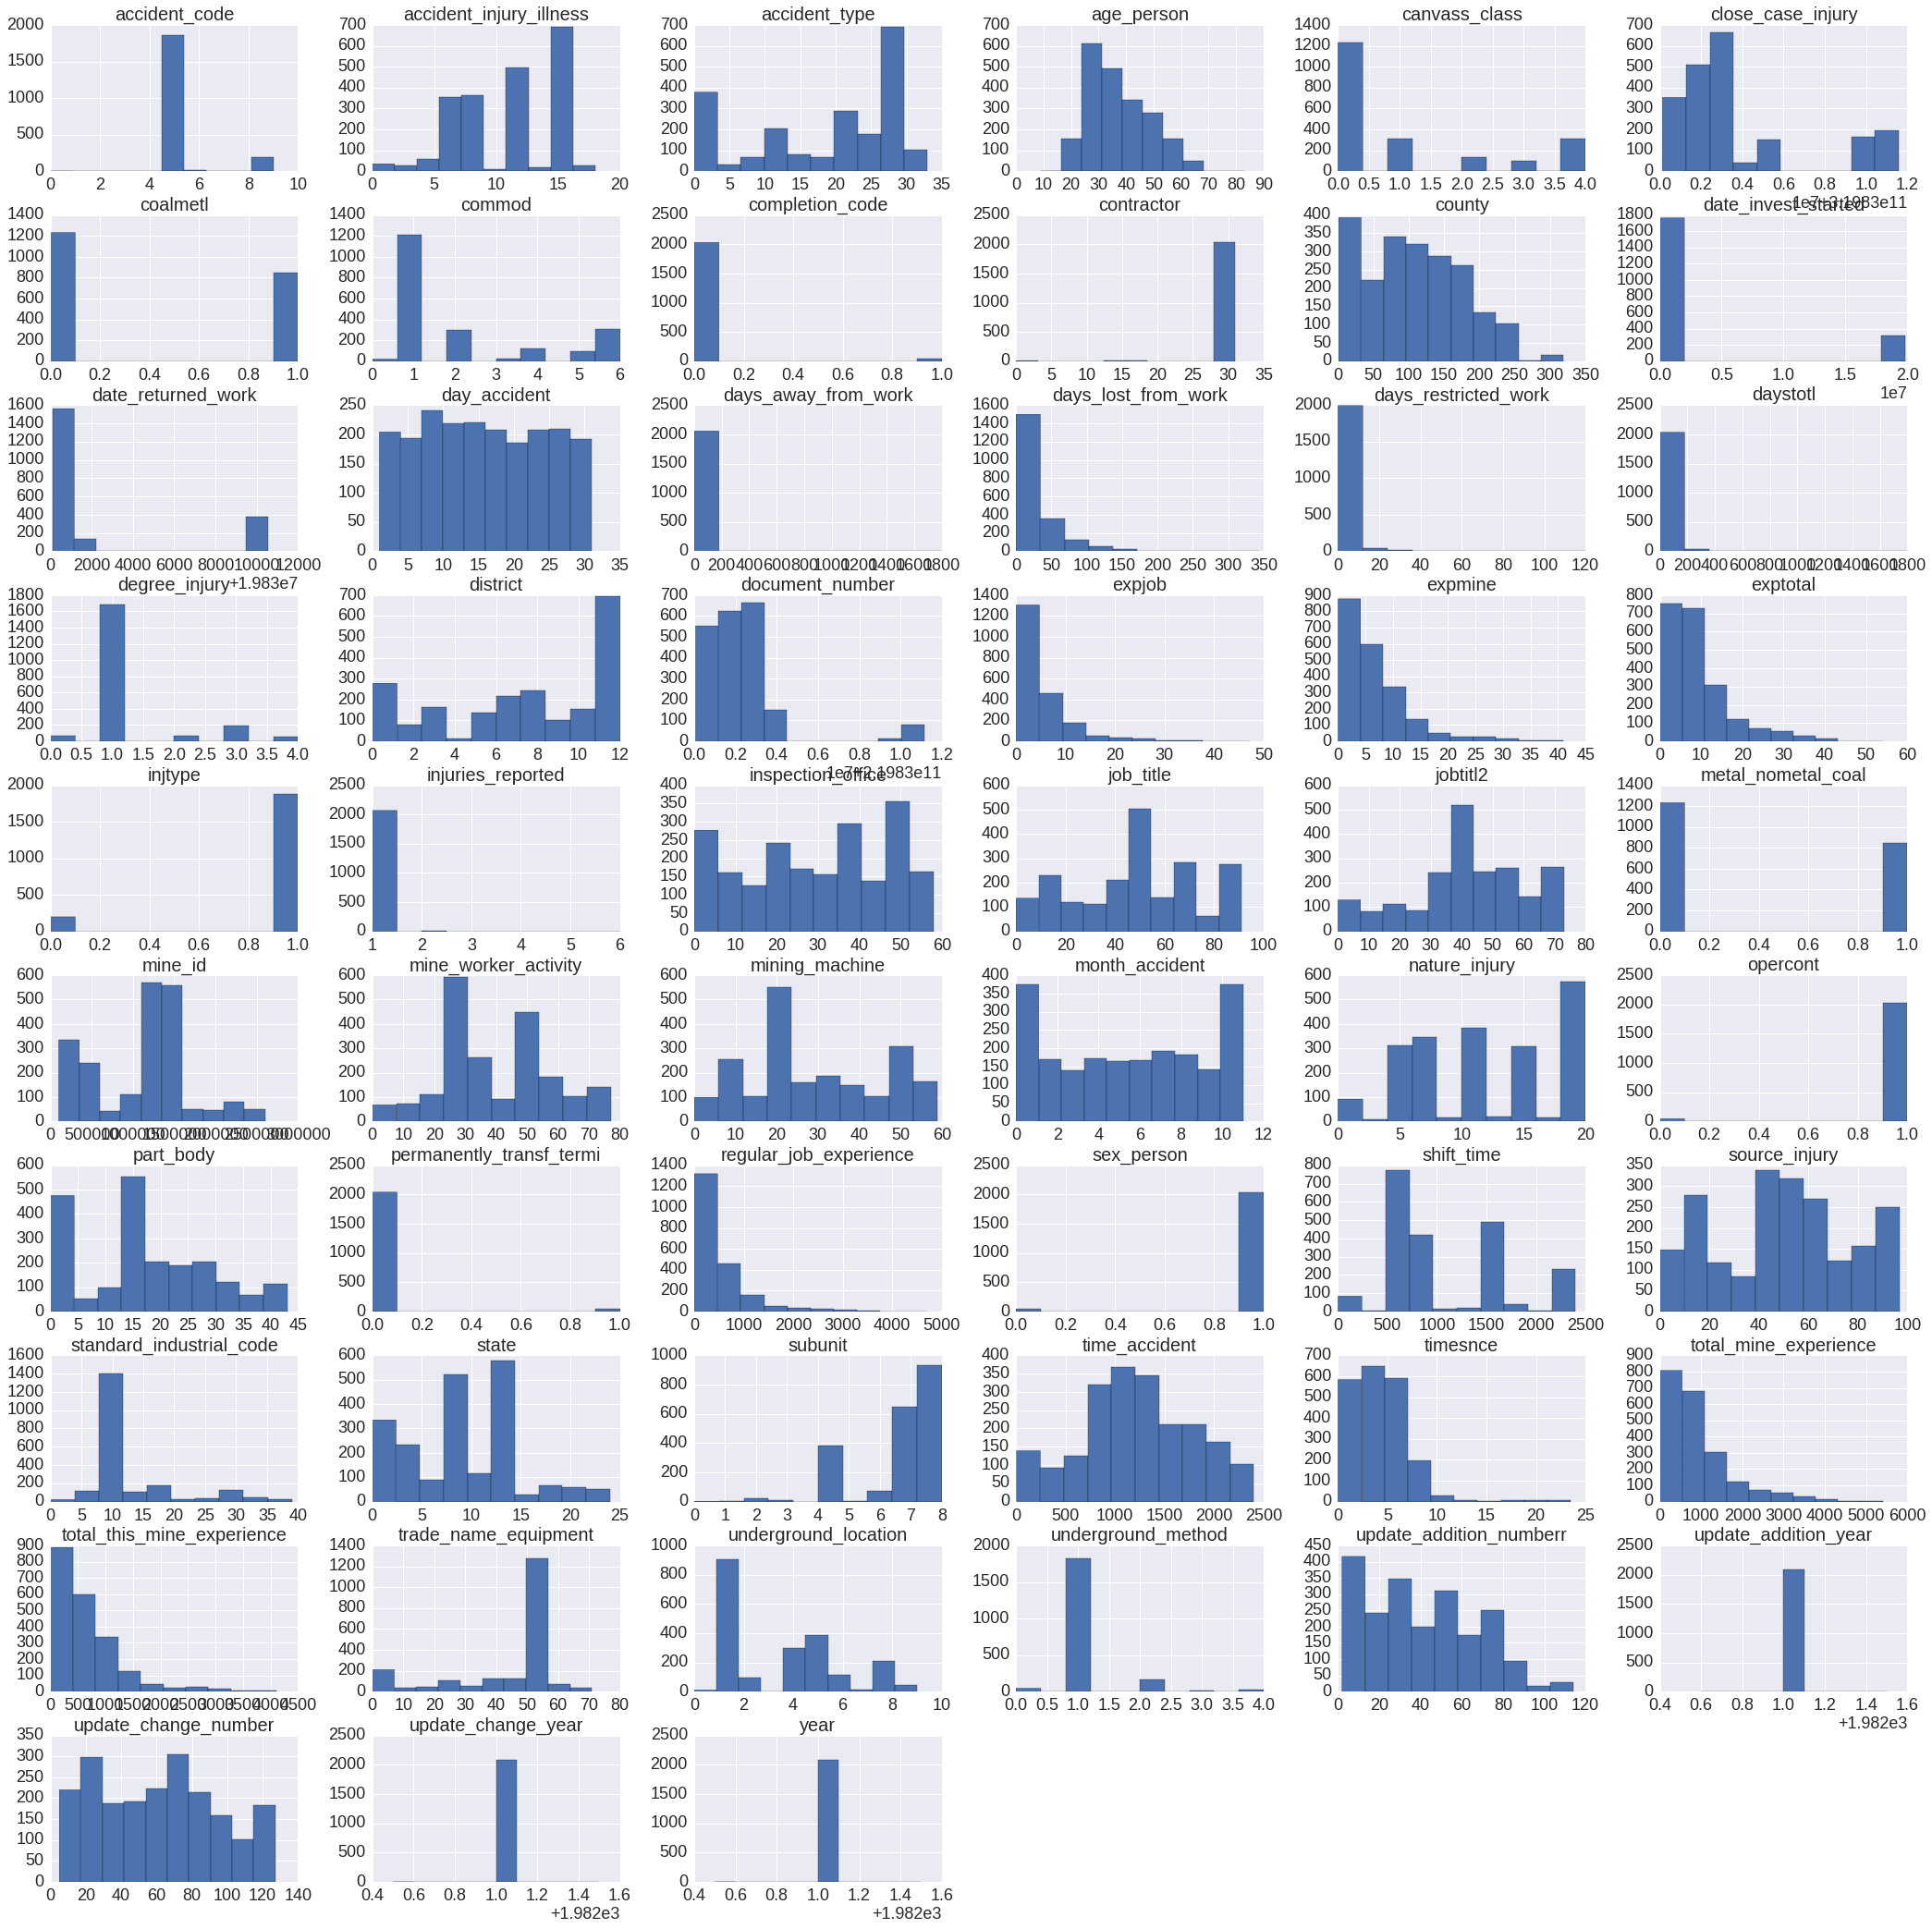

CPU times: user 21.7 s, sys: 8.22 s, total: 29.9 s
Wall time: 15.9 s


In [28]:
%%time
dataNew.hist(figsize=(36.,36.), layout=(10,6))
plt.show()
plt.close()

In [29]:
dataNew.accident_injury_illness.value_counts()

12    497
15    405
8     365
7     346
16    284
4      54
0      29
17     24
3      19
14     11
13      9
9       7
6       7
2       7
1       6
5       6
10      3
18      2
11      1
Name: accident_injury_illness, dtype: int64

In [30]:
encodersDict['accident_injury_illness'].inverse_transform([12,15,8,7,16])

array(['Machinery', 'Powered haulage', 'Handtools', 'Handling material',
       'Slip or fall of person (from an elevation or on the same level)'], dtype=object)

 La mayor cantidad de accidentes ocurre en estas clases de actividades

In [31]:
dataNew.nature_injury.value_counts()

19    483
11    373
6     331
14    285
4     273
20     80
1      53
5      41
0      39
15     22
12     18
7      17
8      15
18     12
16     12
10     11
2       6
3       4
17      3
9       2
13      2
Name: nature_injury, dtype: int64

In [32]:
encodersDict['nature_injury'].inverse_transform([19,11,6,14,4])

array(['Sprain, strains', 'Fracture, chip', 'Cut, laceration, puncture',
       'Multiple injuries', 'Contusion, bruise'], dtype=object)

# Correlation Matrix

In [33]:
from collections import OrderedDict

dictFI = OrderedDict(fi.head(20))
dictFI

OrderedDict([('nature_injury', 0.074153743123729188),
             ('source_injury', 0.068614783535671159),
             ('accident_injury_illness', 0.054613071406214748),
             ('mine_worker_activity', 0.046429447904171674),
             ('part_body', 0.0336977731385514),
             ('age_person', 0.03160555788956762),
             ('mine_id', 0.031121664808902265),
             ('timesnce', 0.029028752166438358),
             ('time_accident', 0.028538225109943093),
             ('mining_machine', 0.023612784323351396),
             ('inspection_office', 0.02306499835979654),
             ('close_case_injury', 0.022443201518236078),
             ('day_accident', 0.02222413859809471),
             ('job_title', 0.021169886674535201),
             ('daystotl', 0.020694298250456895),
             ('county', 0.020458095318601432),
             ('shift_time', 0.018209817616562006),
             ('regular_job_experience', 0.0170447391073596),
             ('trade_name_equipment', 

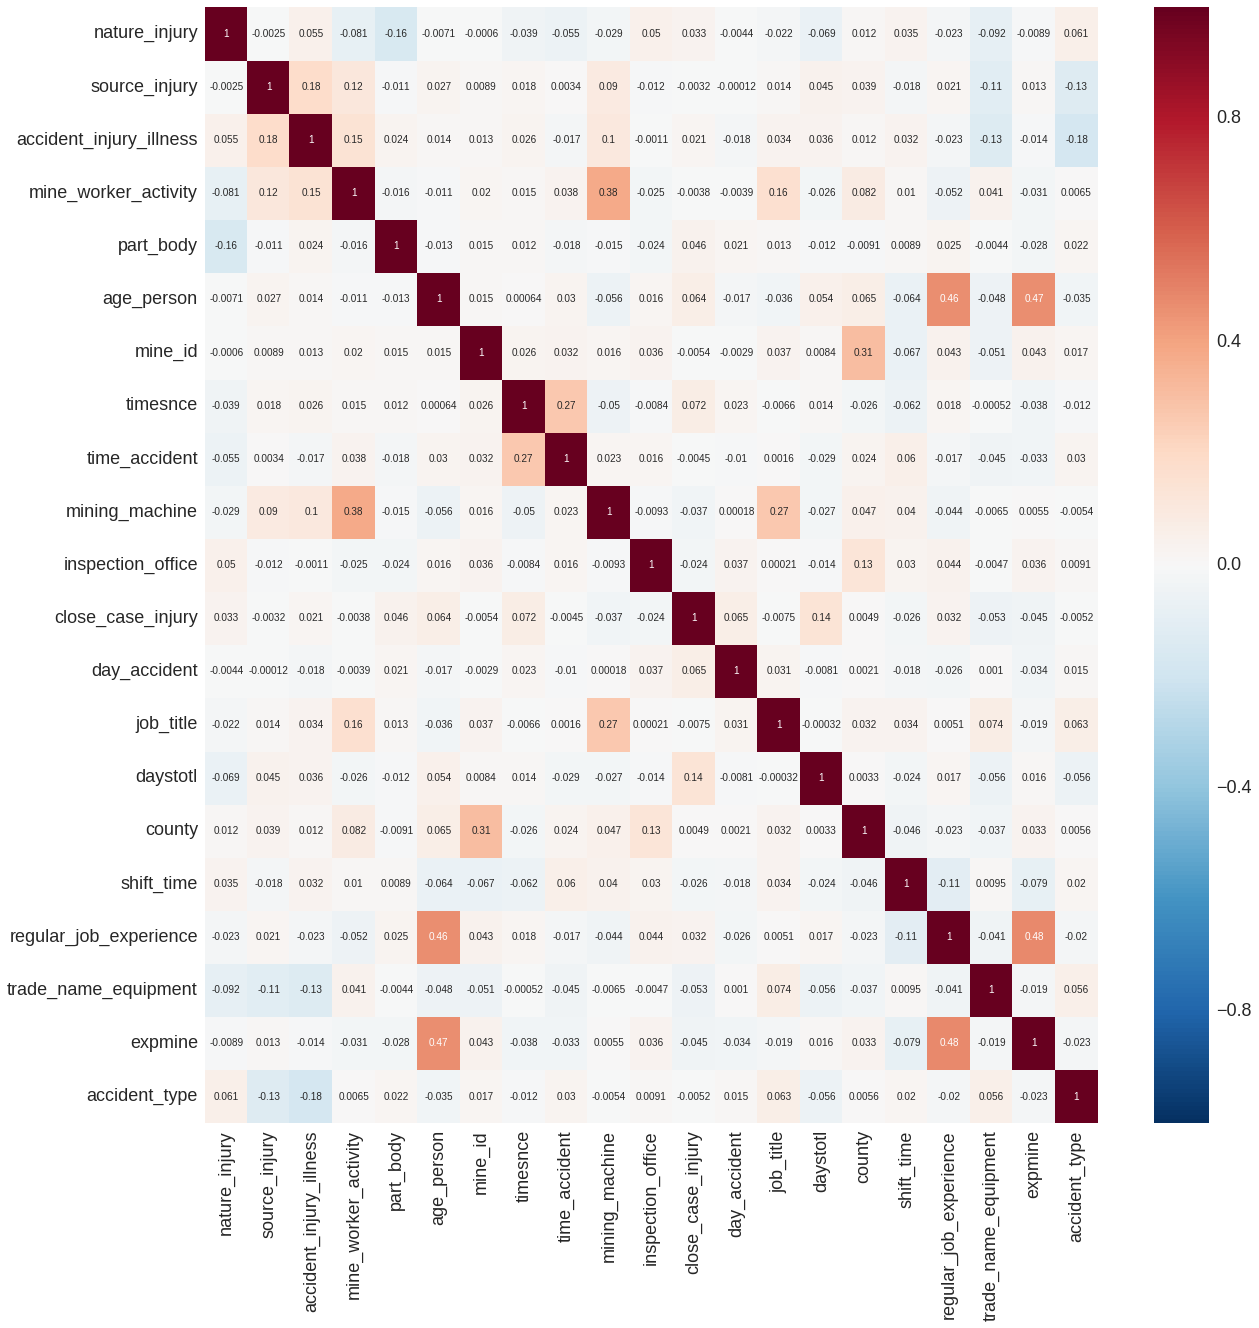

CPU times: user 3.33 s, sys: 714 ms, total: 4.04 s
Wall time: 3.03 s


In [34]:
%%time
features = dictFI.keys()
features.append('accident_type')

def plot_heatmap(df):
    
    fig, axes = plt.subplots(figsize=(20,20))

    sns.heatmap(df, annot=True)

    plt.show()
    plt.close()
    
plot_heatmap(dataNew[features].corr(method='pearson'))

## Brief scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

dataScaled = dataNew.copy()
scaler = StandardScaler()

dictFI2 = OrderedDict(fi)
dictFI2 = dictFI2.keys()
dataScaled[dictFI2] = scaler.fit_transform(dataScaled[dictFI2])
dataScaled.head()

mine_id  contractor   subunit  month_accident  day_accident  \
3  -1.644344   -5.609755  0.146114       -1.305021     -0.852624   
13 -1.644335    0.135873 -1.735589        0.414996      1.597648   
20 -1.644334    0.135873 -1.735589        0.988336     -1.319343   
21 -1.644330    0.135873 -1.735589       -1.305021     -0.269226   
33 -1.644302    0.135873 -1.735589       -0.731682      1.014250   

    time_accident  inspection_office     state    county  \
3       -1.015975          -1.411660 -1.620474  0.127867   
13      -0.865224          -1.411660 -1.620474  0.127867   
20      -0.129203          -1.411660 -1.620474 -0.532950   
21      -1.805203          -1.411660 -1.620474  0.187941   
33       0.855114          -0.767434 -1.620474 -0.893395   

    standard_industrial_code    ...      expmine    expjob  year   injtype  \
3                   0.706096    ...    -1.049963  4.290328   0.0  0.325088   
13                  0.573619    ...    -0.256211  0.004690   0.0  0.325088   
20                  0.706096    ...     0.140389 -0.793301   0.0  0.325088   
21                  1.103525    ...    -0.219133  0.044115   0.0  0.325088   
33                  0.706096    ...    -0.904741 -0.684884   0.0  0.325088   

    daystotl  jobtitl2  coalmetl  opercont  district    commod  
3   2.049432  1.374076  1.203915 -6.580112  0.687159  0.390789  
13  6.887196 -0.515872  1.203915  0.151973  0.687159  1.975771  
20  0.062308 -0.515872  1.203915  0.151973  0.687159  1.975771  
21  0.353614  0.873795  1.203915  0.151973  0.687159  1.975771  
33 -0.156172 -0.182352  1.203915  0.151973  0.687159  1.975771  

[5 rows x 57 columns]

# Multivariate Plots

## Scatter Plot

In [45]:
dataNew.head(10)

mine_id  contractor  subunit  month_accident  day_accident  time_accident  \
3    100003          14        7               1             8          645.0   
13   100008          31        4               7            29          730.0   
20   100009          31        4               9             4         1145.0   
21   100011          31        4               1            13          200.0   
33   100028          31        4               3            24         1700.0   
40   100040          31        4               2             5         1030.0   
41   100042          31        7               5            14         1430.0   
46   100043          31        4               8            25         1045.0   
48   100050          31        4               7            30         1630.0   
49   100050          31        7               6             6          715.0   

    inspection_office  state  county  standard_industrial_code   ...    \
3                   6      0     117                        17   ...     
13                  6      0     117                        16   ...     
20                  6      0      73                        17   ...     
21                  6      0     121                        20   ...     
33                 17      0      49                        17   ...     
40                  6      0     117                        16   ...     
41                  6      0      73                        17   ...     
46                  6      0      73                         5   ...     
48                  6      0     117                        17   ...     
49                  6      0     117                        17   ...     

      expmine     expjob  year  injtype  daystotl  jobtitl2  coalmetl  \
3    0.076660  30.000000  1983        1     235.0        67         1   
13   5.000000   5.000000  1983        1     700.0        33         1   
20   7.459959   0.344969  1983        1      44.0        33         1   
21   5.229979   5.229979  1983        1      72.0        58         1   
33   0.977413   0.977413  1983        1      23.0        39         1   
40  13.000000   5.000000  1983        1      23.0        39         1   
41   2.000000   0.498289  1983        1      14.0        67         1   
46  13.364134   7.229979  1983        1      18.0        39         1   
48   6.843258   6.843258  1983        0       0.0        39         1   
49   2.306639   2.000000  1983        1       4.0        42         1   

    opercont  district  commod  
3          0        10       3  
13         1        10       6  
20         1        10       6  
21         1        10       6  
33         1        10       6  
40         1        10       6  
41         1        10       6  
46         1        10       6  
48         1        10       6  
49         1        10       6  

[10 rows x 57 columns]

In [42]:
scatter = dictFI.keys()[:5]
scatter.append('accident_type')
scatter

['nature_injury',
 'source_injury',
 'accident_injury_illness',
 'mine_worker_activity',
 'part_body',
 'accident_type']

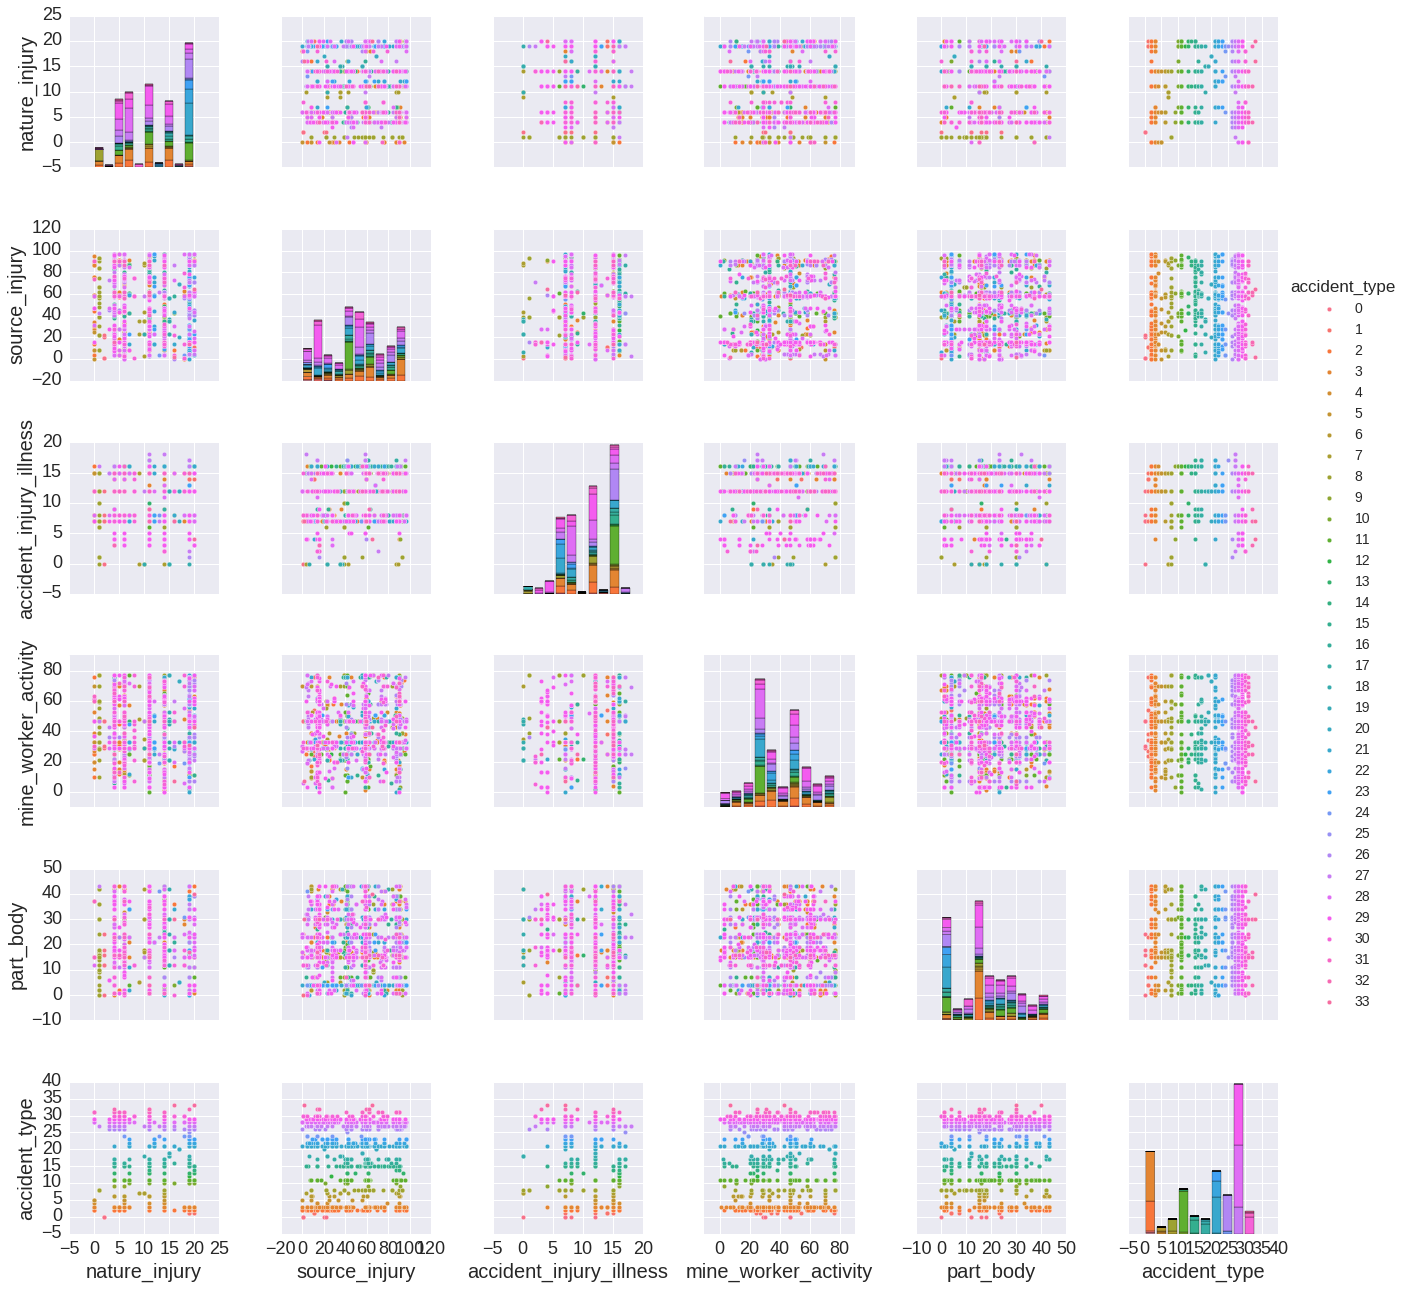

CPU times: user 40.2 s, sys: 15.4 s, total: 55.6 s
Wall time: 28.4 s


In [71]:
%%time
sns.pairplot(dataNew[scatter], hue="accident_type", size=3)
plt.show()

CPU times: user 6.68 s, sys: 1.13 s, total: 7.81 s
Wall time: 5.88 s


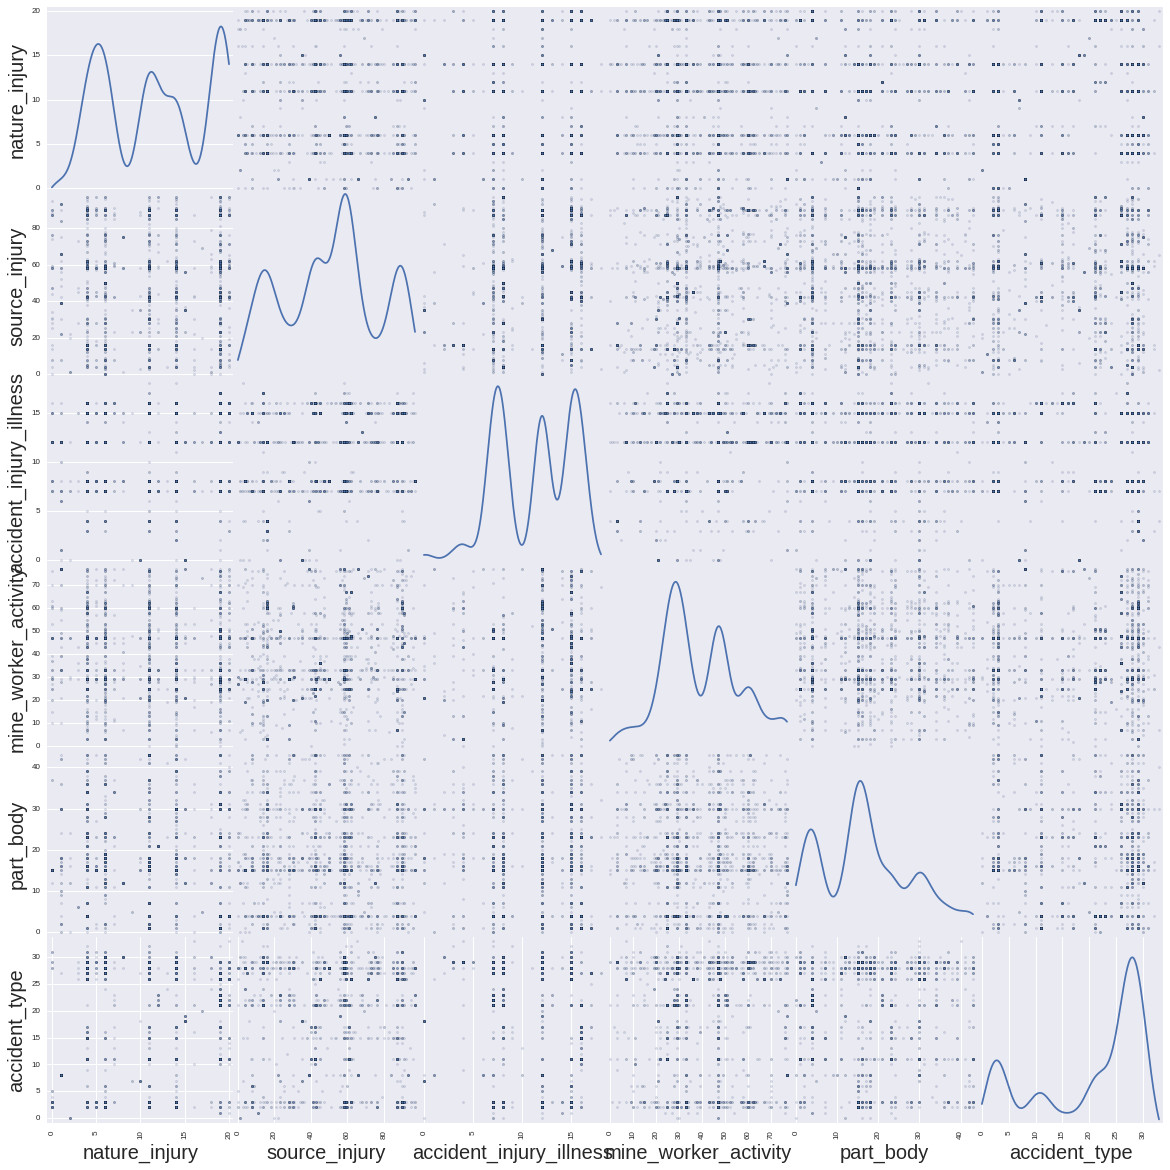

In [72]:
%%time
from pandas.tools.plotting import scatter_matrix

scatter_matrix(dataNew[scatter], alpha=0.2, figsize=(20, 20), diagonal='kde')

## Andrews Curves

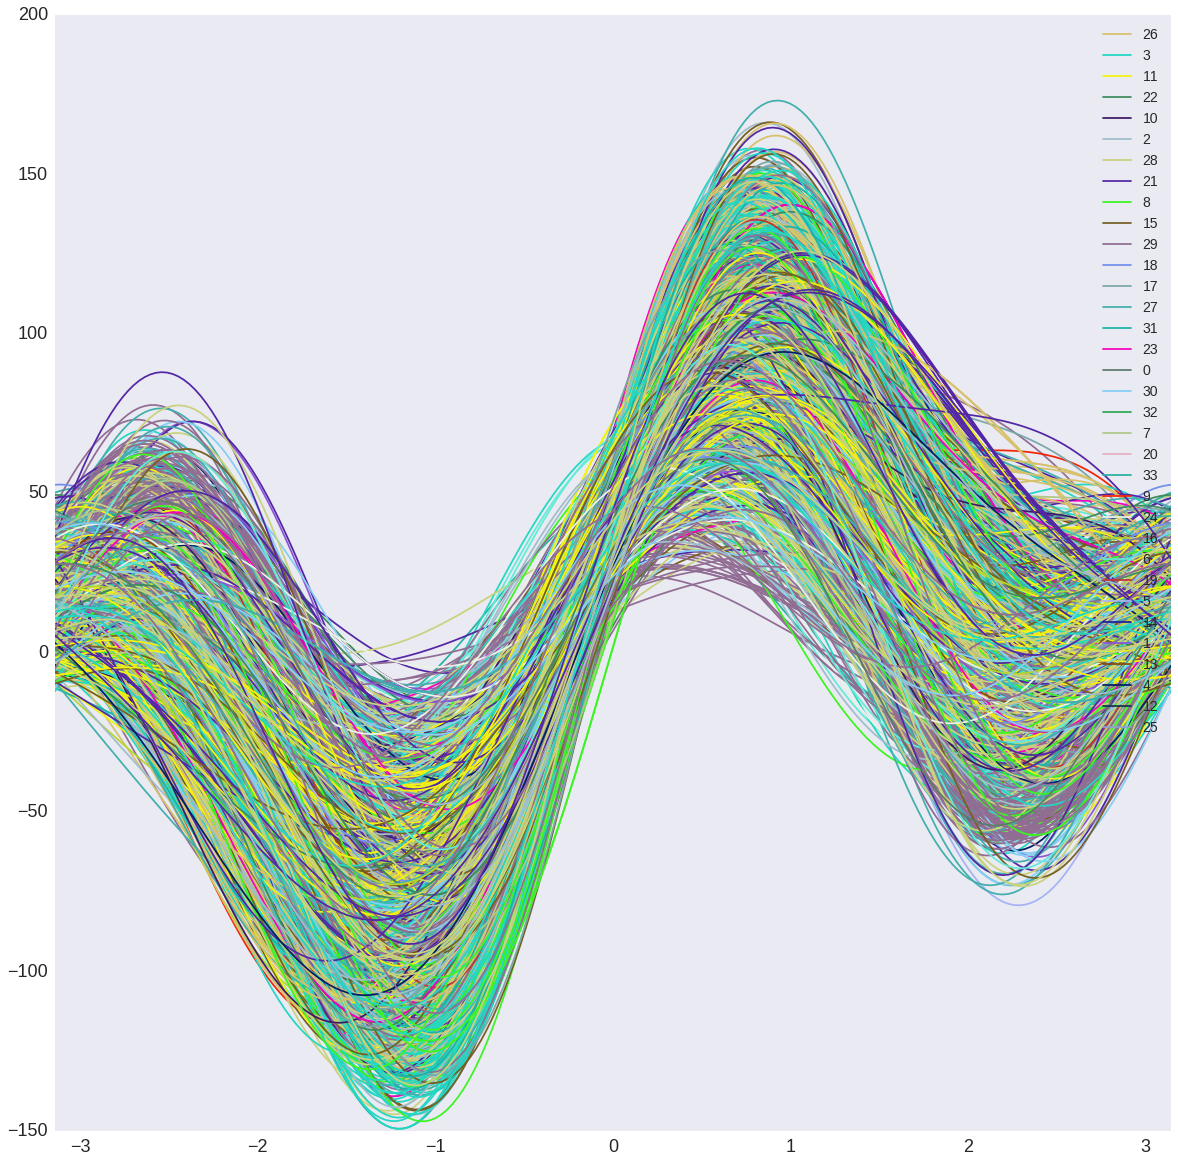

CPU times: user 10.1 s, sys: 306 ms, total: 10.4 s
Wall time: 9.92 s


In [74]:
%%time
from pandas.tools.plotting import andrews_curves

andrew = dictFI.keys()[:5]
andrew.append('accident_type')


plt.figure(figsize=(20,20))
andrews_curves(dataNew[andrew], 'accident_type')
plt.show()

## Pararallel_coordinates


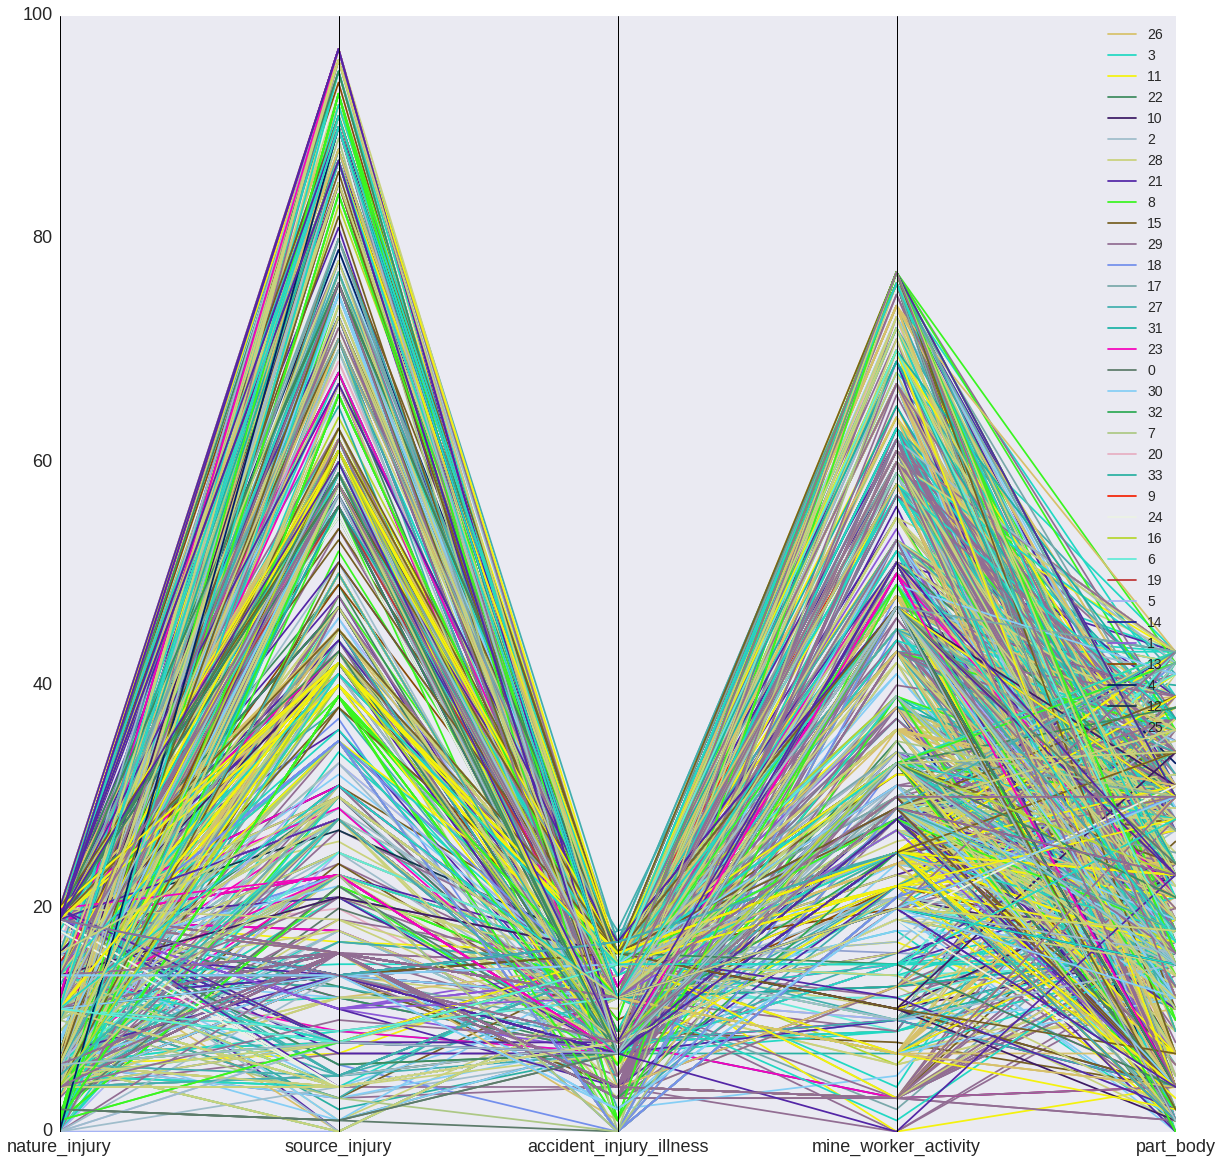

CPU times: user 10.2 s, sys: 456 ms, total: 10.7 s
Wall time: 10 s


In [75]:
%%time
from pandas.tools.plotting import parallel_coordinates

parallel = dictFI.keys()[:5]
parallel.append('accident_type')


plt.figure(figsize=(20,20))
parallel_coordinates(dataNew[parallel], 'accident_type')
plt.show()

Se observa que al plotear las variables agrupadas con la variable <i>accident_type</i> los puntos y lineas no se logran diferenciar muy bien, esto es por que se esta prediciendo 42 clases. Se podria reducir la cantidad de clases, reclasificando los tipos de accidentes, es decir, los menos frecuentes se pondrian 'in the same bag', con esto se lograria una delineacion de fronteras mas visible (logistic, pca,svm,decision tree).

## Box Plots

In [ ]:
# box = dictFI.keys()[:6]
# box.append('accident_type')

# dataNew[box].plot(kind="box", figsize=(16.,16.))
# plt.xticks(rotation='vertical')


# Modeling

In [ ]:
# %%time
# import define
# import analyze
# import prepare
# import feature_selection
# import evaluate

# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.svm import SVC
# from sklearn import cross_validation
# import pandas as pd

# #name = "datasets/iris.csv"
# name = "datasets/Processed_Data_part.csv"
# #name = "datasets/LocalizationOld.csv"
# #name = "datasets/seguridad.csv"
# #name = "datasets/breast-cancer-wisconsin.csv"
# #name = "breast-cancer-wisconsin.csv"
# #name = "inputBus.csv"
# # className = "Ruta"
# #className = "CATEGORY"
# #className = "class"
# className = "position"

# #STEP 0: Define workflow parameters
# definer = define.Define(nameData=name, className=className).pipeline()

# #STEP 1: Analyze data by ploting it
# #analyze.Analyze(definer).pipeline()

# #STEP 2: Prepare data by scaling, normalizing, etc. 
# preparer = prepare.Prepare(definer).pipeline()

# #STEP 3: Feature selection
# featurer = feature_selection.FeatureSelection(definer).pipeline()

# #STEP4: Evalute the algorithms by using the pipelines
# evaluator = evaluate.Evaluate(definer, preparer, featurer).pipeline()

